# Applied ML Project

## Dataset description

The New York Kaggle Airbnb dataset is a comprehensive dataset that contains detailed information on Airbnb listings in New York City, USA. The dataset includes over 48,000 listings and 16 features, including the listing price, location, neighbourhood, number of bedrooms, number of bathrooms, number of reviews, minimum number of nights, and more. This dataset provides a wealth of information that can be used for various purposes, including market analysis, price prediction, and recommendations.





In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

airbnb_df = pd.read_csv("AB_NYC_2019.csv")

### Data Cleaning

In [3]:
# last_review isn't particularly useful, and host_name is a sensitive attribute that 
# also won't help us to predict prices
airbnb_df.drop(['id','host_name','last_review'], axis=1, inplace=True)
airbnb_df.fillna({'reviews_per_month':0}, inplace=True)


# Decision Tree

In [4]:
df = airbnb_df

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

cat_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

X = airbnb_df.drop(columns=['name','price','host_id'])
y = airbnb_df['price']

ordinal_encoder = OrdinalEncoder()
X_trans = ordinal_encoder.fit_transform(X[cat_features])
X[cat_features]=X_trans

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

#max_depth = 7
# for d in range(4,15):
dtree = DecisionTreeRegressor(max_depth=7)
dtree = dtree.fit(X_dev, y_dev)
y_dev_pred = dtree.predict(X_dev)

print("depth: 7", " MSE on the development set: ", mean_squared_error(y_dev, y_dev_pred))

y_test_pred = dtree.predict(X_test)
print("depth: 7", " MSE on the test set: ", mean_squared_error(y_test, y_test_pred))

depth: 7  MSE on the development set:  38051.847844680655
depth: 7  MSE on the test set:  42002.3811226761


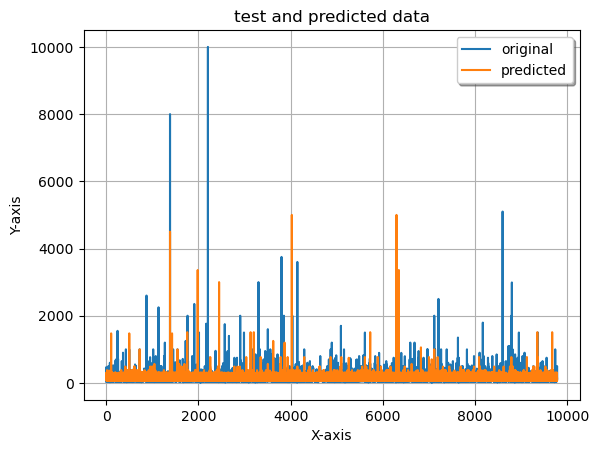

In [7]:
x_ax = range(len(y_test_pred))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred, label="predicted")
plt.title("test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

In [8]:
path = dtree.cost_complexity_pruning_path(X_dev, y_dev)
ccp_alphas=path.ccp_alphas
dtrees = []

print(ccp_alphas)

# for ccp_alpha in ccp_alphas:
#     dtree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
#     dtree.fit(X_dev, y_dev)
#     dtrees.append(dtree)
    
# dev_scores = [dtree.score(X_dev, y_dev) for dtree in dtrees]
# test_scores = [dtree.score(X_test, y_test) for dtree in dtrees]

# fig, ax = plt.subplots()
# ax.set_xlabel("alpha")
# ax.set_ylabel("MSE")
# ax.set_title("MSE vs alpha for development and testing sets")
# ax.plot(ccp_alphas, dev_scores, marker='o', label="development", drawstyle="steps-post")
# ax.plot(ccp_alphas, test_scores, marker='o', label="testing", drawstyle="steps-post")
# ax.legend()
# plt.show()

[0.00000000e+00 1.39201350e-02 2.54975798e-01 1.34984879e+00
 1.82374703e+00 2.12354609e+00 2.68310602e+00 2.77950100e+00
 4.14910523e+00 5.02541062e+00 5.75610872e+00 6.06929343e+00
 6.85014627e+00 7.02053801e+00 7.30020809e+00 7.81143542e+00
 9.01306611e+00 9.05737021e+00 9.56573290e+00 9.74304539e+00
 9.90909517e+00 1.01526582e+01 1.11582556e+01 1.13821251e+01
 1.19747120e+01 1.32708809e+01 1.51843097e+01 1.55844462e+01
 1.87232758e+01 1.88367733e+01 1.95659820e+01 2.01739649e+01
 2.37868669e+01 2.39278498e+01 2.63068340e+01 2.78921094e+01
 2.92930868e+01 3.00120372e+01 3.68217879e+01 3.79731661e+01
 4.17931410e+01 4.57431014e+01 5.15649478e+01 5.80020598e+01
 6.17211810e+01 6.49722686e+01 6.82285847e+01 8.04967129e+01
 8.59684641e+01 8.82642773e+01 9.54996894e+01 1.12167395e+02
 1.21017362e+02 1.35487847e+02 1.45717665e+02 1.47911706e+02
 1.68731814e+02 1.84493064e+02 1.99520020e+02 2.08336490e+02
 2.38883665e+02 3.30263389e+02 3.70917381e+02 5.29907640e+02
 5.88167234e+02 7.029784

In [9]:
len(ccp_alphas)

70

In [10]:
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dtree.fit(X_dev, y_dev)
    dtrees.append(dtree)
    
dev_scores = [dtree.score(X_dev, y_dev) for dtree in dtrees]
test_scores = [dtree.score(X_test, y_test) for dtree in dtrees]


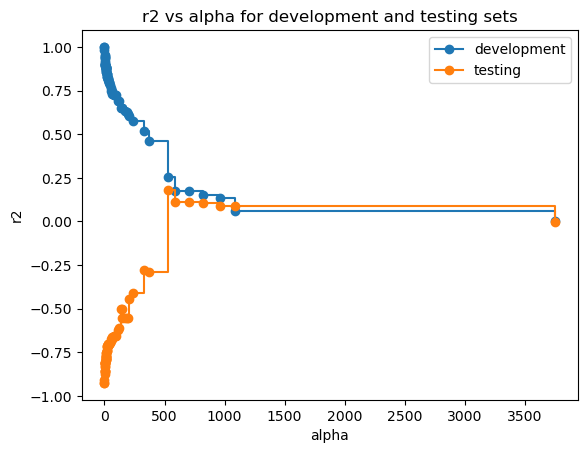

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("r2")
ax.set_title("r2 vs alpha for development and testing sets")
ax.plot(ccp_alphas, dev_scores, marker='o', label="development", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="testing", drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
print("Best alpha:", path.ccp_alphas[test_scores.index(max(test_scores))])

Best alpha: 529.9076395683445


In [13]:
dtree = DecisionTreeRegressor(random_state=0, ccp_alpha=529.9076395683445)
dtree.fit(X_dev, y_dev)
y_dev_pred = dtree.predict(X_dev)

print(" Score on the development set: ", r2_score(y_dev, y_dev_pred))

y_test_pred = dtree.predict(X_test)
print(" Score on the test set: ", r2_score(y_test, y_test_pred))

 Score on the development set:  0.25555551827943157
 Score on the test set:  0.17968552853328934


# Decision Tree with preprocessing function

In [17]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)
    df.fillna({'reviews_per_month': 0}, inplace=True)

    numerical_columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
    for col in numerical_columns:
        df[col].fillna(df[col].mean(), inplace=True)
    df['room_type'].fillna(df['room_type'].mode()[0], inplace=True)

    df = df[np.log1p(df['price']) < 8]
    df = df[np.log1p(df['price']) > 3]
    df['price'] = np.log1p(df['price'])
    df['minimum_nights'] = np.log1p(df['minimum_nights'])

    df['all_year_avail'] = df['availability_365'] > 353
    df['low_avail'] = df['availability_365'] < 12
    df['no_reviews'] = df['reviews_per_month'] == 0

    return df

airbnb_df = preprocess_data("AB_NYC_2019.csv")

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type', 'all_year_avail', 'low_avail', 'no_reviews']
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')

X = airbnb_df.drop(columns=['price'])
y = airbnb_df['price']

X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV

dtree = DecisionTreeRegressor(max_depth=7)
#cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=91)
cv_scores = cross_val_score(dtree, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
dtree.fit(X_train, y_train)
y_train_predicted = dtree.predict(X_train)
y_test_predicted = dtree.predict(X_test)

dtree_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],
            'CV error': -cv_scores.mean(), 
            'CV std': cv_scores.std(),
            'training error': [mean_squared_error(y_train, y_train_predicted)],
            'test error': [mean_squared_error(y_test, y_test_predicted)],
            'training_r2_score': [r2_score(y_train, y_train_predicted)],
            'test_r2_score': [r2_score(y_test, y_test_predicted)]})

print(dtree_results)

                 algorithm  CV error    CV std  training error  test error  \
0  Random Forest Regressor  0.200807  0.004778        0.187281    0.200657   

   training_r2_score  test_r2_score  
0           0.592488       0.561161  
